<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/7.%20Week%207/Boosting_or_Bagging_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

#2. Loading Dataset

In [13]:
def load_and_clean_data(dataset_name):
    print(f"\n{'='*50}")
    print(f"Memproses dataset: {dataset_name}")
    print(f"{'='*50}")

    if dataset_name == 'heart':
        # Dataset Heart Disease
        url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
        df = pd.read_csv(url)

        print("Informasi Dataset Heart Disease:")
        print(f"Jumlah data: {df.shape[0]}")
        print(f"Jumlah fitur: {df.shape[1]-1}")
        print(f"Nilai kosong: {df.isnull().sum().sum()}")

        # Periksa nama kolom
        print("\nKolom dalam dataset:")
        print(df.columns.tolist())

        # Identifikasi kolom target (akan menduga 'target' sebagai kolom target)
        target_col = 'target' if 'target' in df.columns else None

        if target_col is None:
            # Cari kolom yang mungkin berisi label target
            for col in df.columns:
                if df[col].nunique() <= 5:  # Target klasifikasi biasanya memiliki nilai unik yang sedikit
                    target_col = col
                    break

        if target_col is None:
            # Jika masih tidak ditemukan, gunakan kolom terakhir
            target_col = df.columns[-1]

        print(f"\nMenggunakan '{target_col}' sebagai kolom target")
        print("\nDistribusi Target:")
        print(df[target_col].value_counts(normalize=True))

        # Pastikan y adalah numerik untuk klasifikasi
        if not pd.api.types.is_numeric_dtype(df[target_col]):
            le = LabelEncoder()
            df[target_col] = le.fit_transform(df[target_col])
            print("\nKolom target telah diubah menjadi nilai numerik")

        # Split fitur dan target
        X = df.drop(target_col, axis=1)
        y = df[target_col]

        # Identifikasi jenis kolom
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        print(f"\nFitur numerik: {numerical_cols}")
        print(f"Fitur kategorikal: {categorical_cols}")

    elif dataset_name == 'water':
        # Dataset Citarum Water
        url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv"
        df = pd.read_csv(url)

        print("Informasi Dataset Citarum Water:")
        print(f"Jumlah data: {df.shape[0]}")
        print(f"Jumlah fitur: {df.shape[1]-1}")
        print(f"Nilai kosong: {df.isnull().sum().sum()}")

        # Periksa nama kolom
        print("\nKolom dalam dataset:")
        print(df.columns.tolist())

        # Identifikasi kolom target (akan menduga 'Class' sebagai kolom target)
        target_col = 'Class' if 'Class' in df.columns else 'class' if 'class' in df.columns else None

        if target_col is None:
            # Cari kolom yang mungkin berisi label target
            for col in df.columns:
                if df[col].nunique() <= 5:  # Target klasifikasi biasanya memiliki nilai unik yang sedikit
                    target_col = col
                    break

        if target_col is None:
            # Jika masih tidak ditemukan, gunakan kolom terakhir
            target_col = df.columns[-1]

        print(f"\nMenggunakan '{target_col}' sebagai kolom target")
        print("\nDistribusi Target:")
        print(df[target_col].value_counts(normalize=True))

        # Pastikan y adalah numerik untuk klasifikasi
        if not pd.api.types.is_numeric_dtype(df[target_col]):
            le = LabelEncoder()
            df[target_col] = le.fit_transform(df[target_col])
            print("\nKolom target telah diubah menjadi nilai numerik")

        # Split fitur dan target
        X = df.drop(target_col, axis=1)
        y = df[target_col]

        # Identifikasi jenis kolom
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        print(f"\nFitur numerik: {numerical_cols}")
        print(f"Fitur kategorikal: {categorical_cols}")

    elif dataset_name == 'income':
        # Dataset Income
        url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/income.csv"
        df = pd.read_csv(url)

        print("Informasi Dataset Income:")
        print(f"Jumlah data: {df.shape[0]}")
        print(f"Jumlah fitur: {df.shape[1]-1}")
        print(f"Nilai kosong: {df.isnull().sum().sum()}")

        # Periksa nama kolom
        print("\nKolom dalam dataset:")
        print(df.columns.tolist())

        # Identifikasi kolom target (akan menduga 'income' sebagai kolom target)
        target_col = 'income' if 'income' in df.columns else 'Income' if 'Income' in df.columns else None

        if target_col is None:
            # Cari kolom yang mungkin berisi label target
            for col in df.columns:
                if df[col].nunique() <= 5:  # Target klasifikasi biasanya memiliki nilai unik yang sedikit
                    target_col = col
                    break

        if target_col is None:
            # Jika masih tidak ditemukan, gunakan kolom terakhir
            target_col = df.columns[-1]

        print(f"\nMenggunakan '{target_col}' sebagai kolom target")
        print("\nDistribusi Target:")
        print(df[target_col].value_counts(normalize=True))

        # Pastikan y adalah numerik untuk klasifikasi
        if not pd.api.types.is_numeric_dtype(df[target_col]):
            le = LabelEncoder()
            df[target_col] = le.fit_transform(df[target_col])
            print("\nKolom target telah diubah menjadi nilai numerik")

        # Split fitur dan target
        X = df.drop(target_col, axis=1)
        y = df[target_col]

        # Identifikasi jenis kolom
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        print(f"\nFitur numerik: {numerical_cols}")
        print(f"Fitur kategorikal: {categorical_cols}")

    return X, y, numerical_cols, categorical_cols


#3. Preprocessing

In [14]:
def build_preprocessing_pipeline(numerical_cols, categorical_cols):
    # Preprocessing untuk fitur numerik
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Preprocessing untuk fitur kategorikal
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Gabungkan transformers dalam ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    return preprocessor

#4. Training & Evaluasi Model Boosting

In [15]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, preprocessor, model_name='xgboost'):
    # Tentukan model berdasarkan nama
    if model_name == 'xgboost':
        model = xgb.XGBClassifier(random_state=42)
        param_grid = {
            'estimator__learning_rate': [0.01, 0.1],
            'estimator__max_depth': [3, 5],
            'estimator__n_estimators': [100, 200]
        }
    elif model_name == 'lightgbm':
        model = lgb.LGBMClassifier(random_state=42)
        param_grid = {
            'estimator__learning_rate': [0.01, 0.1],
            'estimator__num_leaves': [31, 50],
            'estimator__n_estimators': [100, 200]
        }
    else:  # GradientBoostingClassifier
        model = GradientBoostingClassifier(random_state=42)
        param_grid = {
            'estimator__learning_rate': [0.01, 0.1],
            'estimator__max_depth': [3, 5],
            'estimator__n_estimators': [100, 200]
        }

    # Buat pipeline dengan preprocessor dan model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('estimator', model)
    ])

    print(f"\nMelakukan hyperparameter tuning untuk model {model_name}...")

    # Latih model dengan grid search untuk hyperparameter tuning
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"Parameter terbaik: {grid_search.best_params_}")

    # Dapatkan model terbaik
    best_model = grid_search.best_estimator_

    # Lakukan prediksi pada data test
    y_pred = best_model.predict(X_test)

    # Untuk roc_auc, kita perlu probability
    y_pred_proba = None
    auc = None
    if len(np.unique(y_test)) == 2:  # Pastikan binary classification
        try:
            y_pred_proba = best_model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_pred_proba)
        except:
            print("Tidak dapat menghitung AUC-ROC (mungkin kelas tidak biner atau model tidak mendukung predict_proba)")

    # Hitung metrik evaluasi
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'auc': auc
    }

    print("\nMetrik Evaluasi Model:")
    for metric, value in metrics.items():
        if value is not None:
            print(f"{metric}: {value:.4f}")

    # Tampilkan classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return best_model, metrics, y_pred, y_pred_proba


#5. Visualisasi Data

In [16]:
def visualize_results(y_test, y_pred, y_pred_proba=None, model=None, dataset_name=None):
    # Confusion Matrix
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix {dataset_name if dataset_name else ""}')
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show()

    # ROC Curve (hanya untuk klasifikasi biner)
    if y_pred_proba is not None and len(np.unique(y_test)) == 2:
        plt.figure(figsize=(10, 6))
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.4f}')
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve {dataset_name if dataset_name else ""}')
        plt.legend()
        plt.show()

#6. Melakukan Analisis



######################################################################
# ANALISIS DATASET: HEART
######################################################################

Memproses dataset: heart
Informasi Dataset Heart Disease:
Jumlah data: 303
Jumlah fitur: 13
Nilai kosong: 6

Kolom dalam dataset:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Menggunakan 'sex' sebagai kolom target

Distribusi Target:
sex
1    0.679868
0    0.320132
Name: proportion, dtype: float64

Fitur numerik: ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Fitur kategorikal: []

Pembagian data:
Training: 242 sampel
Testing: 61 sampel

--------------------------------------------------
MODEL: XGBOOST
--------------------------------------------------

Melakukan hyperparameter tuning untuk model xgboost...
Parameter terbaik: {'estimator__learning_rate': 0.1, 'estimator__max_dep

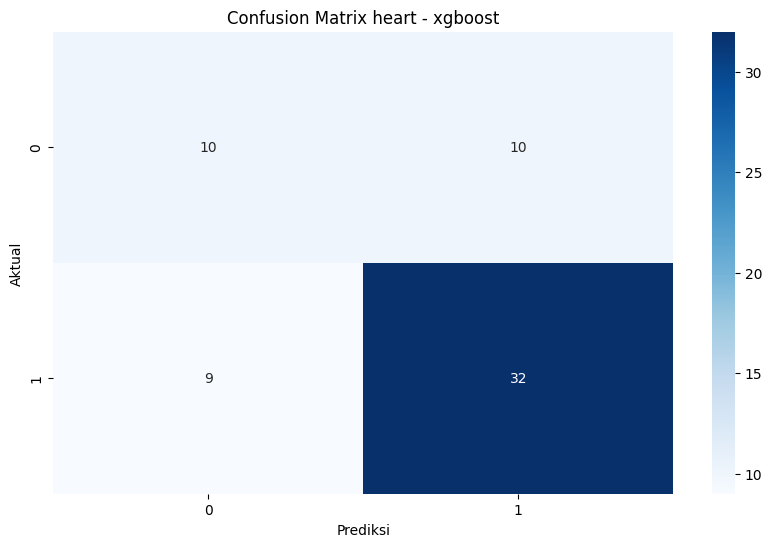

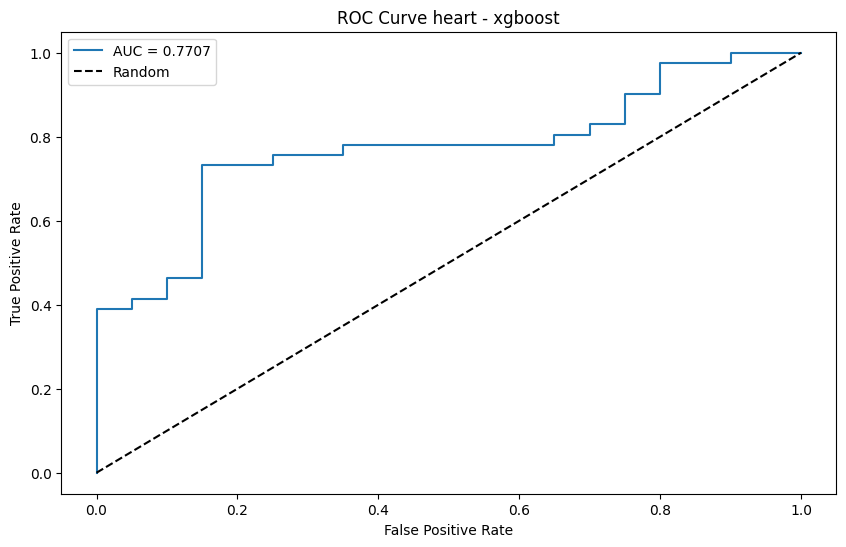


--------------------------------------------------
MODEL: LIGHTGBM
--------------------------------------------------

Melakukan hyperparameter tuning untuk model lightgbm...
[LightGBM] [Info] Number of positive: 165, number of negative: 77
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.681818 -> initscore=0.762140
[LightGBM] [Info] Start training from score 0.762140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

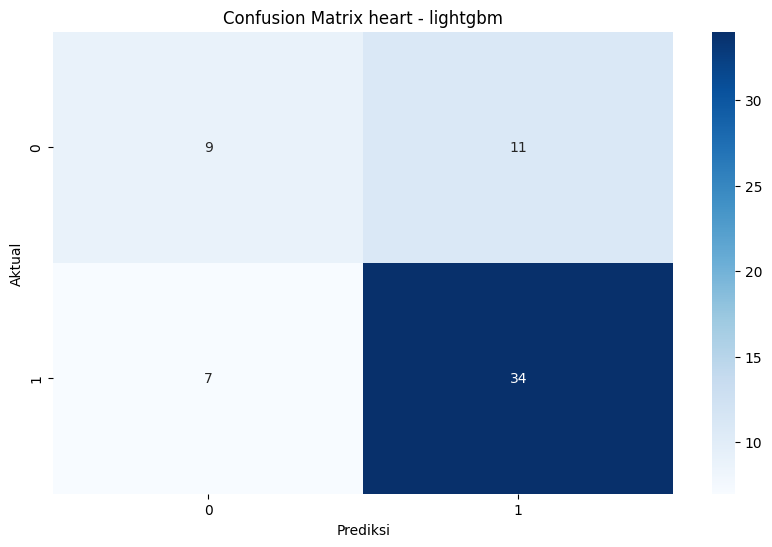

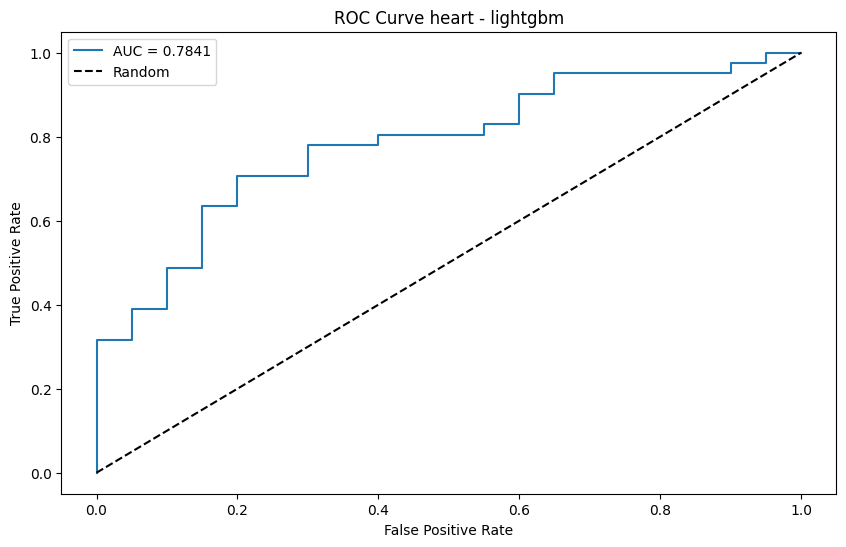


--------------------------------------------------
MODEL: GBM
--------------------------------------------------

Melakukan hyperparameter tuning untuk model gbm...
Parameter terbaik: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 100}

Metrik Evaluasi Model:
accuracy: 0.6393
precision: 0.6393
recall: 0.6393
f1: 0.6393
auc: 0.7207

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        20
           1       0.73      0.73      0.73        41

    accuracy                           0.64        61
   macro avg       0.59      0.59      0.59        61
weighted avg       0.64      0.64      0.64        61



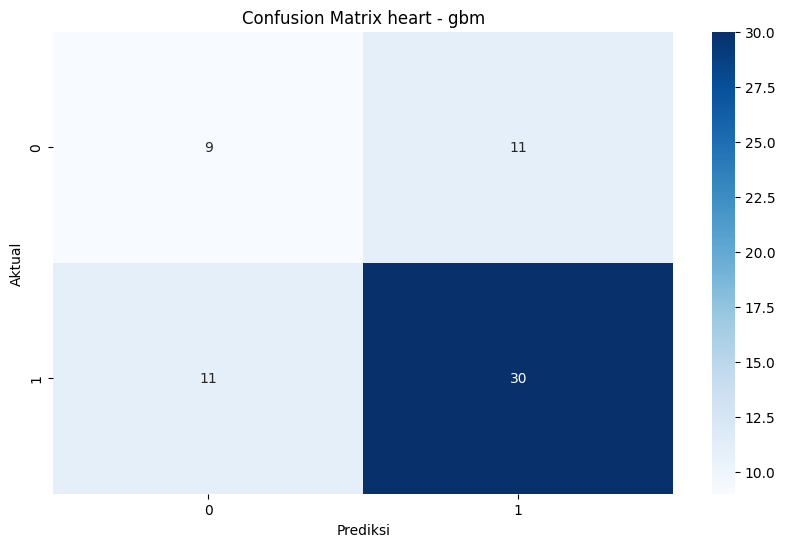

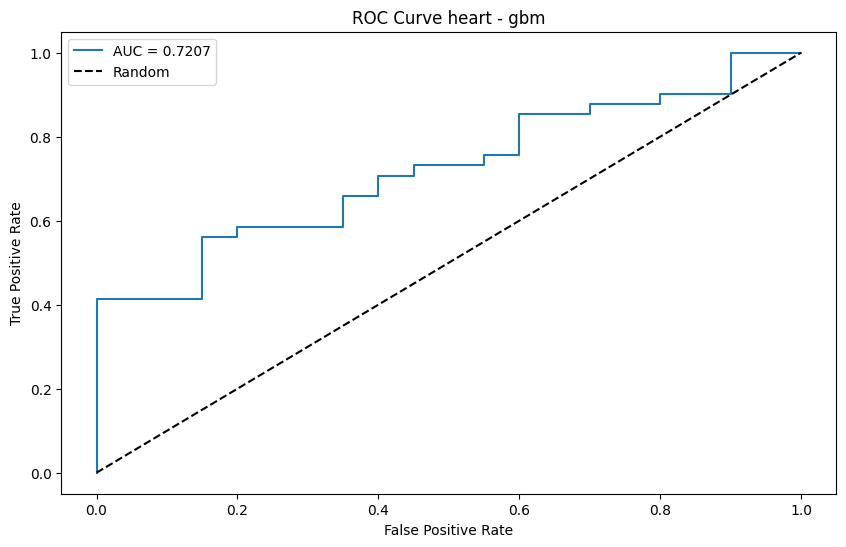


Model terbaik untuk dataset heart: lightgbm
Metrik model terbaik:
accuracy: 0.7049
precision: 0.6923
recall: 0.7049
f1: 0.6954
auc: 0.7841


######################################################################
# ANALISIS DATASET: WATER
######################################################################

Memproses dataset: water
Informasi Dataset Citarum Water:
Jumlah data: 2500
Jumlah fitur: 15
Nilai kosong: 0

Kolom dalam dataset:
['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'O2', 'IP', 'Class']

Menggunakan 'Class' sebagai kolom target

Distribusi Target:
Class
2    0.5984
1    0.3792
3    0.0156
4    0.0068
Name: proportion, dtype: float64

Fitur numerik: ['No', 'pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']
Fitur kategorikal: ['NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2']

Pembagian data:
Training: 2000 sampel
Testing: 500 sampel

----------------------------------

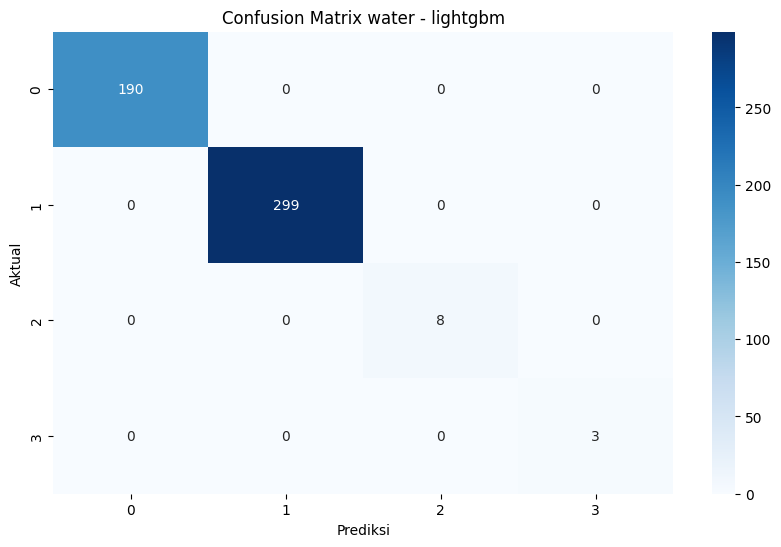


--------------------------------------------------
MODEL: GBM
--------------------------------------------------

Melakukan hyperparameter tuning untuk model gbm...
Parameter terbaik: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 100}

Metrik Evaluasi Model:
accuracy: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       299
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         3

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



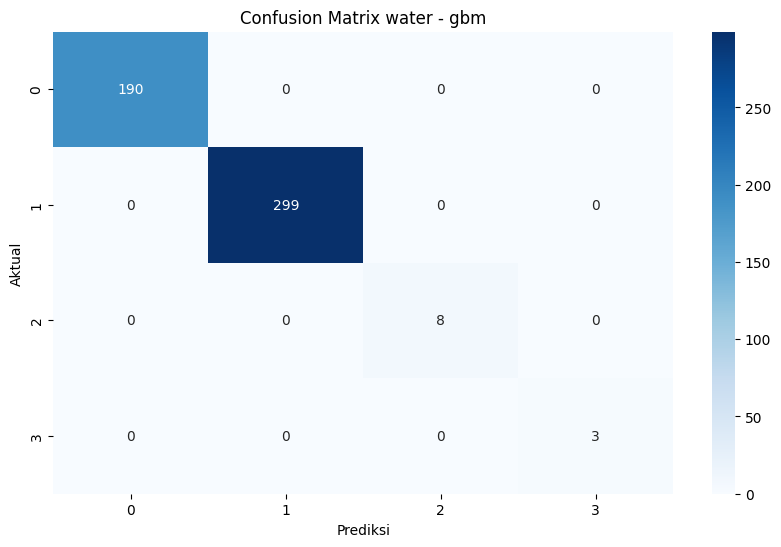


Model terbaik untuk dataset water: lightgbm
Metrik model terbaik:
accuracy: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000


######################################################################
# ANALISIS DATASET: INCOME
######################################################################

Memproses dataset: income
Informasi Dataset Income:
Jumlah data: 48842
Jumlah fitur: 14
Nilai kosong: 2203

Kolom dalam dataset:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Menggunakan 'income' sebagai kolom target

Distribusi Target:
income
<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
Name: proportion, dtype: float64

Kolom target telah diubah menjadi nilai numerik

Fitur numerik: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Fitur kategorikal: ['workclass', 'educat

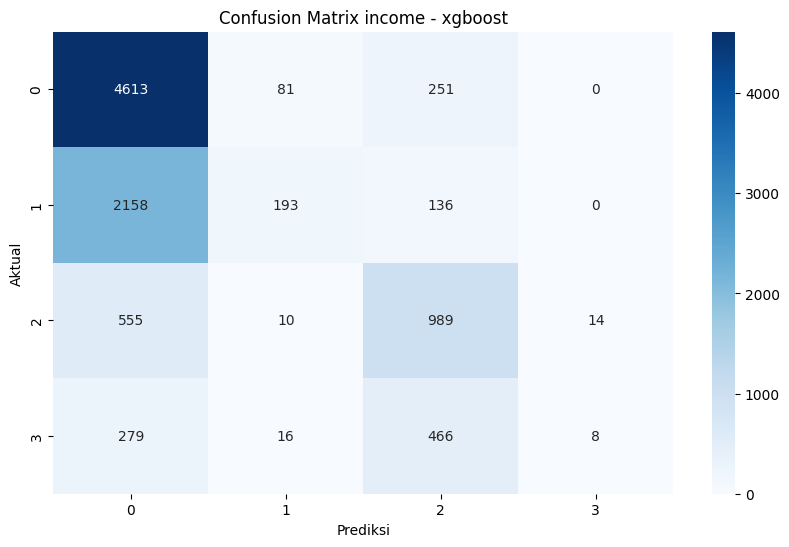


--------------------------------------------------
MODEL: LIGHTGBM
--------------------------------------------------

Melakukan hyperparameter tuning untuk model lightgbm...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 99
[LightGBM] [Info] Start training from score -0.681013
[LightGBM] [Info] Start training from score -1.368060
[LightGBM] [Info] Start training from score -1.829177
[LightGBM] [Info] Start training from score -2.541477
Parameter terbaik: {'estimator__learning_rate': 0.01, 'estimator__n_estimators': 200, 'estimator__num_leaves': 31}

Metrik Evaluasi Model:
accuracy: 0.5931
precision: 0.5683
recall: 0.5931
f1: 0.4960

Classification Report:
              precision    recal

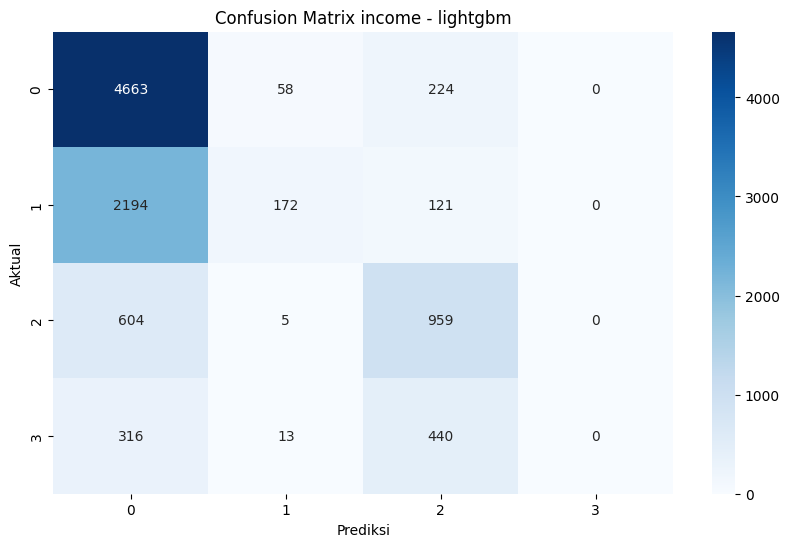


--------------------------------------------------
MODEL: GBM
--------------------------------------------------

Melakukan hyperparameter tuning untuk model gbm...
Parameter terbaik: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 200}

Metrik Evaluasi Model:
accuracy: 0.5951
precision: 0.5897
recall: 0.5951
f1: 0.5059

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.93      0.74      4945
           1       0.66      0.08      0.15      2487
           2       0.53      0.64      0.58      1568
           3       0.35      0.02      0.03       769

    accuracy                           0.60      9769
   macro avg       0.54      0.42      0.37      9769
weighted avg       0.59      0.60      0.51      9769



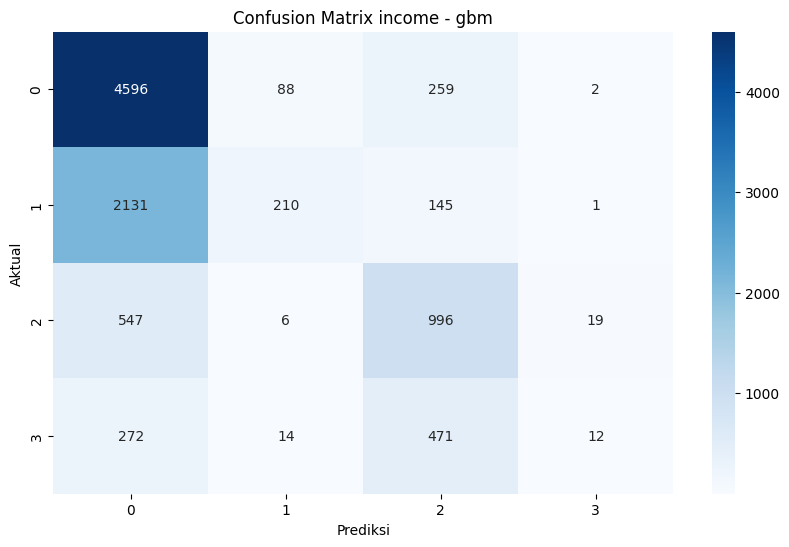


Model terbaik untuk dataset income: gbm
Metrik model terbaik:
accuracy: 0.5951
precision: 0.5897
recall: 0.5951
f1: 0.5059


**********************************************************************
RINGKASAN HASIL TERBAIK UNTUK SEMUA DATASET
**********************************************************************

Dataset: heart
Model terbaik: lightgbm
Metrik:
- accuracy: 0.7049
- precision: 0.6923
- recall: 0.7049
- f1: 0.6954
- auc: 0.7841

Dataset: water
Model terbaik: lightgbm
Metrik:
- accuracy: 1.0000
- precision: 1.0000
- recall: 1.0000
- f1: 1.0000

Dataset: income
Model terbaik: gbm
Metrik:
- accuracy: 0.5951
- precision: 0.5897
- recall: 0.5951
- f1: 0.5059


In [19]:
def run_complete_analysis():
    # Daftar dataset yang akan dianalisis
    datasets = ['heart', 'water', 'income']

    # Model boosting yang akan digunakan
    boosting_models = ['xgboost', 'lightgbm', 'gbm']

    # Dictionary untuk menyimpan hasil metrik terbaik
    best_metrics = {}

    # Loop melalui semua dataset
    for dataset_name in datasets:
        print(f"\n\n{'#'*70}")
        print(f"# ANALISIS DATASET: {dataset_name.upper()}")
        print(f"{'#'*70}")

        try:
            # Muat dan bersihkan data
            X, y, numerical_cols, categorical_cols = load_and_clean_data(dataset_name)

            # Split data menjadi training dan testing
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

            print(f"\nPembagian data:")
            print(f"Training: {X_train.shape[0]} sampel")
            print(f"Testing: {X_test.shape[0]} sampel")

            # Buat preprocessing pipeline
            preprocessor = build_preprocessing_pipeline(numerical_cols, categorical_cols)

            # Dictionary untuk menyimpan hasil metrik untuk dataset ini
            dataset_metrics = {}

            # Loop melalui semua model boosting
            for model_name in boosting_models:
                print(f"\n{'-'*50}")
                print(f"MODEL: {model_name.upper()}")
                print(f"{'-'*50}")

                try:
                    # Latih dan evaluasi model
                    trained_model, metrics, y_pred, y_pred_proba = train_and_evaluate_model(
                        X_train, X_test, y_train, y_test, preprocessor, model_name
                    )

                    # Simpan metrik untuk model ini
                    dataset_metrics[model_name] = metrics

                    # Visualisasi hasil
                    visualize_results(y_test, y_pred, y_pred_proba, trained_model, f"{dataset_name} - {model_name}")

                except Exception as e:
                    print(f"Error saat memproses model {model_name} untuk dataset {dataset_name}: {str(e)}")

            if dataset_metrics:
                # Tentukan model terbaik berdasarkan F1 score
                best_model = max(dataset_metrics, key=lambda k: dataset_metrics[k]['f1'])

                print(f"\nModel terbaik untuk dataset {dataset_name}: {best_model}")
                print(f"Metrik model terbaik:")
                for metric, value in dataset_metrics[best_model].items():
                    if value is not None:
                        print(f"{metric}: {value:.4f}")

                # Simpan metrik terbaik untuk dataset ini
                best_metrics[dataset_name] = {
                    'model': best_model,
                    'metrics': dataset_metrics[best_model]
                }

        except Exception as e:
            print(f"Error saat memproses dataset {dataset_name}: {str(e)}")

    # Ringkasan hasil terbaik untuk semua dataset
    if best_metrics:
        print(f"\n\n{'*'*70}")
        print("RINGKASAN HASIL TERBAIK UNTUK SEMUA DATASET")
        print(f"{'*'*70}")

        for dataset_name, result in best_metrics.items():
            print(f"\nDataset: {dataset_name}")
            print(f"Model terbaik: {result['model']}")
            print("Metrik:")
            for metric, value in result['metrics'].items():
                if value is not None:
                    print(f"- {metric}: {value:.4f}")
    else:
        print("\nTidak ada hasil yang dapat diringkas. Semua dataset mengalami error saat pemrosesan.")

run_complete_analysis()

# Penjelasan Matematika: Boosting dan Metrik Evaluasi Klasifikasi

## A. Boosting untuk Klasifikasi

Boosting merupakan metode ensemble yang mengombinasikan beberapa model lemah (base learners) secara iteratif untuk membangun model yang lebih kuat. Secara umum, model boosting dapat dituliskan sebagai:
$$
F(x) = F_0(x) + \sum_{m=1}^{M} \gamma_m h_m(x)
$$
di mana:
- $F_0(x)$ adalah prediksi awal (misalnya probabilitas dasar atau log odds),
- $h_m(x)$ adalah base learner pada iterasi ke-$m$ (misalnya decision tree),
- $\gamma_m$ adalah bobot learning rate yang mengatur kontribusi masing-masing base learner.

Pada setiap iterasi, boosting mengupdate model dengan memfokuskan pada error yang masih tersisa dari model sebelumnya.

## B. Metrik Evaluasi Klasifikasi

Evaluasi performa model klasifikasi dilakukan dengan beberapa metrik sebagai berikut:

1. **Accuracy**  
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$
   Accuracy mengukur proporsi prediksi yang benar.

2. **Precision**  
   $$
   \text{Precision} = \frac{TP}{TP+FP}
   $$
   Precision menunjukkan akurasi prediksi positif.

3. **Recall**  
   $$
   \text{Recall} = \frac{TP}{TP+FN}
   $$
   Recall mengukur kemampuan model menangkap kasus positif.

4. **F1 Score**  
   F1 score adalah rata-rata harmonis dari precision dan recall:
   $$
   F1 = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$
   Untuk analisis tambahan, kita juga dapat menghitung **F1 Squared** sebagai:
   $$
   F1^2 = (F1)^2
   $$

5. **ROC Curve dan AUC**  
   ROC (Receiver Operating Characteristic) menggambarkan trade-off antara True Positive Rate (Recall) dan False Positive Rate:
   $$
   \text{TPR} = \frac{TP}{TP+FN}, \quad \text{FPR} = \frac{FP}{FP+TN}
   $$
   AUC (Area Under Curve) mengukur luas di bawah ROC curve sehingga semakin mendekati 1, semakin baik performa model.

Metrik terbaik biasanya ditentukan berdasarkan konteks aplikasinya. Sebagai contoh, pada deteksi penyakit (misalnya HeartDisease) Recall seringkali menjadi metrik penting, sedangkan pada aplikasi lain (misalnya income prediction) AUC bisa memberikan gambaran yang lebih komprehensif terhadap performa model.
